# 1. LLM Classification Prompting


In [ ]:
!pip install openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.5/220.5 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 9.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
llmx 0.0.15a0 requires cohere, which is not installed.
llmx 0.0.15a0 requires tiktoken, which is not installed.


In [ ]:
import pandas as pd
import numpy as np
import openai
from getpass import getpass

In [ ]:
print("Please visit Go to https://platform.openai.com/docs/api-reference/introduction for more information for API KEY credentials")
print("Please Enter your OpenAI API Key below.")
api_key = getpass()
openai.api_key = api_key

Please visit Go to https://platform.openai.com/docs/api-reference/introduction for more information for API KEY credentials
Please Enter your OpenAI API Key below.
··········


In [ ]:
df_product_classification = pd.read_excel('/content/SmarterX_Interns_Sample_Data_Nov2023.xlsx')

In [ ]:
# Checking Summary Statistics
df_product_classification.describe()

,product_upc
count,2.196000e+03
mean,2.703874e+11
std,3.558143e+11
min,8.274444e+09
25%,3.663202e+10
50%,7.007466e+10
75%,6.376180e+11
max,4.001639e+12


In [ ]:
df_product_classification.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2196 entries, 0 to 2195
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   product_upc        2196 non-null   int64 
 1   product_name       2196 non-null   object
 2   item_brand_name    2196 non-null   object
 3   MARKETING_COPY     1197 non-null   object
 4   product_image_url  2196 non-null   object
dtypes: int64(1), object(4)
memory usage: 85.9+ KB


In [ ]:
# Checking NaN Values
df_product_classification.isnull().sum()

product_upc            0
product_name           0
item_brand_name        0
MARKETING_COPY       999
product_image_url      0
dtype: int64

In [ ]:
# Filling NaN values with NumPy's NaN
df_product_classification.fillna(np.NaN)

,product_upc,product_name,item_brand_name,MARKETING_COPY,product_image_url
0,609332833142,e.l.f. 83314 Light Powder Blush Palette 1 ea,e.l.f.,Blush & glow. E.L.F. Clean. This blush palette...,https://target.scene7.com/is/image/Target/GUES...
1,307817154415,Amlactin Ultra Smoothing Intensely Hydrating C...,Amlactin,"Alpha-hydroxy therapy. Softens rough, bumpy ar...",https://target.scene7.com/is/image/Target/GUES...
2,28400171410,SOUR CREAM & ONION FLAVORED POPCORN,SMARTFOOD,No artificial colors or flavors. No artificial...,https://target.scene7.com/is/image/Target/GUES...
3,41333415017,AA ALKALINE BATTERIES,DURACELL,New. Power Boost ingredients.,https://target.scene7.com/is/image/Target/GUES...
4,858847000284,ORGANIC CHIA SEEDS,NAVITAS ORGANICS,Per 12 g Serving: 60 calories; fiber (11% DV)....,https://target.scene7.com/is/image/Target/GUES...
...,...,...,...,...,...
2191,79400458025,Volume & Fullness CONDITIONER,DOVE,NaN,https://target.scene7.com/is/image/Target/GUES...
2192,50255025006,Ritter Sport Dark Chocolate with Marzipan Fill...,Ritter Sport,NaN,https://target.scene7.com/is/image/Target/GUES...
2193,722252139962,CLIF Bar¬Æ Coffee Collection Vanilla Almond La...,Clif,NaN,https://target.scene7.com/is/image/Target/GUES...
2194,99900837205,Baby Ruth Candy Bar Fun Size 10.2 oz,Baby Ruth,NaN,https://target.scene7.com/is/image/Target/GUES...


In [ ]:
df_product_classification['Context'] = df_product_classification.apply(lambda row: f"Product Name: {row['product_name']}\nItem: {row['item_brand_name']}\nMarketing Copy: {row['MARKETING_COPY']}", axis=1)
df_product_classification['Response'] = np.NaN


In [ ]:
def get_response(context):
  response = openai.completions.create(
      model="text-davinci-003",
      temperature = 0,
      # prompt = [{"content" : prompt + context,"role":"assistant"}],
      prompt= prompt + context,
      max_tokens=150,
      n=1,
      stop=None,
  )
  classified_category = response.choices[0].text
  return classified_category

In [ ]:
## Old Prompt:

# prompt = "Identify key features that suggest a product's category based on the information provided. \
#           The text has the Product Name, the Item's Brand Name, and a marketing copy of the item. \
#           Utilizing all the information, identify the global product category of the product."

In [ ]:
# prompt = "You are in charge of optimizing the supermarket layout, and you need to categorize \
# the product. The text has the Product Name, the Item's Brand Name, and a marketing copy of the item. \
# Provide a high-level category like 'Food', 'Electronics,' 'Groceries,' 'cosmetics' 'Apparel,' etc., to \
# facilitate effective product arrangement. Your decision will impact the overall shopping experience."

In [ ]:
# prompt = "Give me exact answer for the question stated below and make sure the response \
#           is in context of what is asked in question, where the answer should not be more than three words. \
#           Identify key features that suggest a product's category based on the information provided. \
#           The text has the Product Name, the Item's Brand Name, and a marketing copy of the item. \
#           Utilizing all the information, identify the global product category of the product. \
#           if there is no marketing copy,  give the best possible category using the other two."

In [ ]:
prompt = "Identify key features that suggest a product's category based on the information provided. \
          The text has the Product Name, the Item's Brand Name, and a marketing copy of the item. \
          Utilizing all the information, identify the global product category of the product."

In [ ]:
prompt = "Assume that you are a manager in a supermarket. Based on Product Name,\
           the Item's Brand Name, and a marketing copy of the item you have to broadly categorize the item.\
           For example categorise Food items as food, beauty products as cosmetics and so on.\
           If the the marketing copy is not available use Product Name and the Item's Brand Name and knowledge from\
           previous classifications. Output should be a category not exceeding 3 words"

Due to the budget constraints for using Open ai API, I ran only the first three products and got the responses. It will give an error but run the next line of code to get the response.

In [ ]:
import time
for index, row in df_product_classification.iterrows():
  df_product_classification['Response'][index] = get_response(row['Context'])
  time.sleep(5)
  if index == 3:
    break

In [ ]:
df_product_classification[['product_name','Response']][:3]

,product_name,Response
0,e.l.f. 83314 Light Powder Blush Palette 1 ea,\n\nCosmetics Blush.
1,Amlactin Ultra Smoothing Intensely Hydrating C...,\n\nSkin Care
2,SOUR CREAM & ONION FLAVORED POPCORN,\n\nSnack Food


Running the responses only for 1 product without Marketing Copy

In [ ]:
# Running the responses only for 1 product without Marketing Copy (Budget Constarints)
context = "Product Name: L'Oreal Paris Magic Root Precision Medium Brown 5 Temporary Gray Concealer 0.05 oz,  Item: Belvita, Marketing Copy:NaN"

In [ ]:
# Getting the responses
print(get_response(context))



Cosmetics


To iterate through the entire file and save it in the Excel file:

In [ ]:
# for index, row in df_product_classification.iterrows():
#   df_product_classification['Response'][index] = get_response(row['Context'])

In [ ]:
df_product_classification.to_excel("Final_data.xlsx")

In [ ]:
df_final_data = pd.read_excel('/content/Final_data.xlsx')

In [ ]:
# Analysi
df_final_data[['product_name','Response']][1235:1240]

,product_name,Response
1235,Elderberry Dietary Supplement,omedicine technology provides potent antioxida...
1236,Strawberry Electrolyte Solution,electrolyte solution for dehydration relief\n...
1237,"Moderate PADS, Lightly scented",otechnology designed to remove odor\n\nCategor...
1238,UDON PREMIUM NOODLE SOUP,"-athin noodles, with a fresh, homemade flavor\..."
1239,Mtn Dew Code Red DEW With A Rush Of Cherry 2 L...,\n\nThis product is likely within the Beverage...


# 2. Data Visualisation

In [ ]:
# importing the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS
from matplotlib.colors import LinearSegmentedColormap

In [ ]:
# Read the Excel file with the second sheet
df_data_viz = pd.read_excel('/content/SmarterX_Interns_Sample_Data_Nov2023.xlsx', sheet_name = 1)

In [ ]:
# Display the contents of the DataFrame
df_data_viz.head()

,UPC,PRODUCT_NAME,BRAND_NAME,ingredients
0,NaN,Tillamook Farmstyle Thick Cut Medium Cheddar S...,Tillamook,"Medium Cheddar Cheese (Cultured Milk, Salt, En..."
1,NaN,Nice N Easy Permanent Creme Color 1 ea,Nice N Easy,"Gray Retexturizing Pre-Treatment: Water, Propy..."
2,8.256801e+06,TEQUILA GOLD MADE WITH BLUE AGAVE,JOSE CUERVO ESPECIAL,NaN
3,NaN,Skin Effects Acne Spot Treatment 0.25 oz,Skin Effects,"Water (Aqua), Squalane, Butylene Glycol, Allyl..."
4,7.621113e+11,Starbucks K-Cup Pods Medium Roast Ground Break...,Starbucks,NaN


In [ ]:
# Check basic info about the DataFrame
df_data_viz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 0 to 4334
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   UPC           2598 non-null   float64
 1   PRODUCT_NAME  4335 non-null   object 
 2   BRAND_NAME    4323 non-null   object 
 3   ingredients   1737 non-null   object 
dtypes: float64(1), object(3)
memory usage: 135.6+ KB


In [ ]:
# Summary statistics of the data
df_data_viz.describe()

,UPC
count,2.598000e+03
mean,7.790222e+11
std,2.686750e+12
min,3.129000e+03
25%,4.122184e+10
50%,7.832737e+10
75%,7.557809e+11
max,9.002875e+13


In [ ]:
# Count of unique values in each column
df_data_viz.nunique()

UPC             2498
PRODUCT_NAME    4212
BRAND_NAME      2707
ingredients     1680
dtype: int64

In [ ]:
# null count
summary = pd.DataFrame({'Total Rows': df_data_viz.shape[0], 'Null Rows': df_data_viz.isnull().sum()})
print(summary)

              Total Rows  Null Rows
UPC                 4335       1737
PRODUCT_NAME        4335          0
BRAND_NAME          4335         12
ingredients         4335       2598


Considering the high proportion of missing data—40% in the UPC column and 60% in the ingredients column—it's advisable to retaining these columns to maintain data quality. However, as the BRAND_NAME column has minimal missing entries (less than 1%), dropping it would preserve valuable brand-related insights.

In [ ]:
# Drop rows with nulls in 'BRAND_NAME'
df_data_viz.dropna(subset=['BRAND_NAME'], inplace=True)

In [ ]:
# Replace null values in 'ingredients' with placeholder
df_data_viz['ingredients'].fillna('Not available', inplace=True)

In [ ]:
# Replace null values in 'UPC' with placeholder
df_data_viz['UPC'].fillna('Not Available', inplace=True)

In [ ]:
# Updated Count of Null
summary = pd.DataFrame({'Total Rows': df_data_viz.shape[0], 'Null Rows': df_data_viz.isnull().sum()})
print(summary)

## Generating Word Cloud for Ingredients

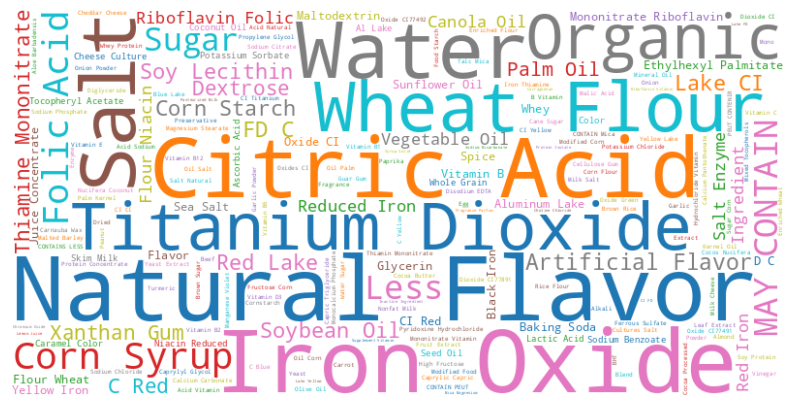

In [ ]:
# Combine all ingredients into a single string, excluding 'Not available' entries
all_ingredients = ' '.join(df_data_viz[df_data_viz['ingredients'] != 'Not available']['ingredients'].astype(str))

# These units are present in the dataset. So adding the same word to my stopwords
additional_stopwords = {'nan', 'oz', 'ea', 'fl', 'mg', 'ml', 'g', 'lb', 'lbs', 'mm', 'cm'}

# Merge the standard English stop words with additional stop words
stopwords = set(STOPWORDS).union(additional_stopwords)


# Generating the word cloud
wordcloud = WordCloud(width=800, height=400, colormap='tab10', background_color='white', stopwords = stopwords ).generate(all_ingredients)


# Displaying the word cloud using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

The above illustrates the frequency and distribution of ingredients in various products. It can be noticed that a lot of products ingredients like "Natural Ingredients", "Citric Acid", "Wheat Flour", "Iron Oxide", etc. This suggests a market inclination toward natural components, staple ingredients, and fortified elements. These findings highlight consumer preferences for healthier options and diverse nutritional attributes promoted in products.

## Top 10 Brand Names

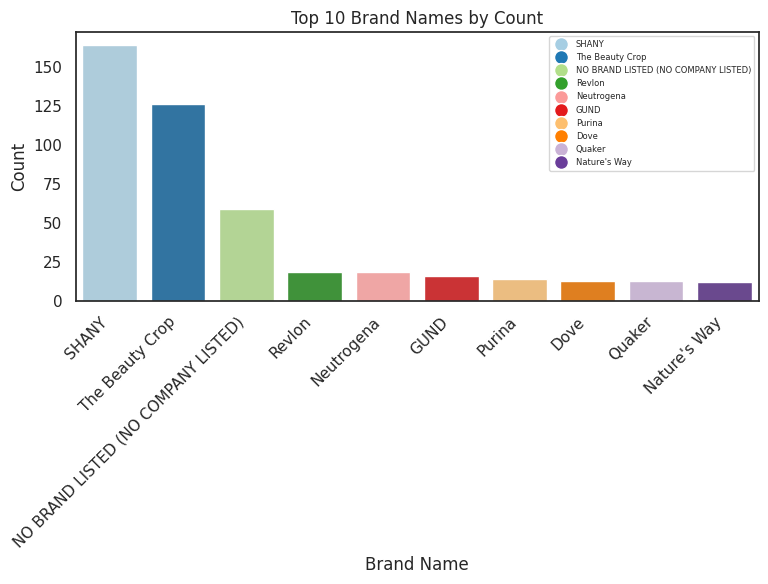

In [ ]:
top_brands = df_data_viz['BRAND_NAME'].value_counts().head(10)
top_brands_df = top_brands.reset_index()
top_brands_df.columns = ['BRAND_NAME', 'COUNT']

# Create the bar plot using Seaborn
plt.figure(figsize=(8, 6))
palette = sns.color_palette("Paired", len(top_brands_df))
sns.barplot(x='BRAND_NAME', y='COUNT', data=top_brands_df, palette=palette)

# Rotate x-labels for better readability
plt.xticks(rotation=45, ha='right')
plt.xlabel('Brand Name')
plt.ylabel('Count')
plt.title('Top 10 Brand Names by Count')

# Custom legend creation
unique_brands = top_brands_df['BRAND_NAME'].tolist()

# Create custom legend labels with corresponding colors
legend_labels = [Line2D([0], [0], marker='o', color='w', markerfacecolor=palette[i], markersize=10, label=brand)
                 for i, brand in enumerate(unique_brands)]

# Show legend with custom labels
plt.legend(handles=legend_labels, loc='upper right',  prop={'size': 6})

plt.tight_layout()
plt.show()

The bar plot suggests that the most prevalent items were beauty products, with SHANY ranking at the forefront, closely followed by Beauty Corp.

## Most Common Ingredients

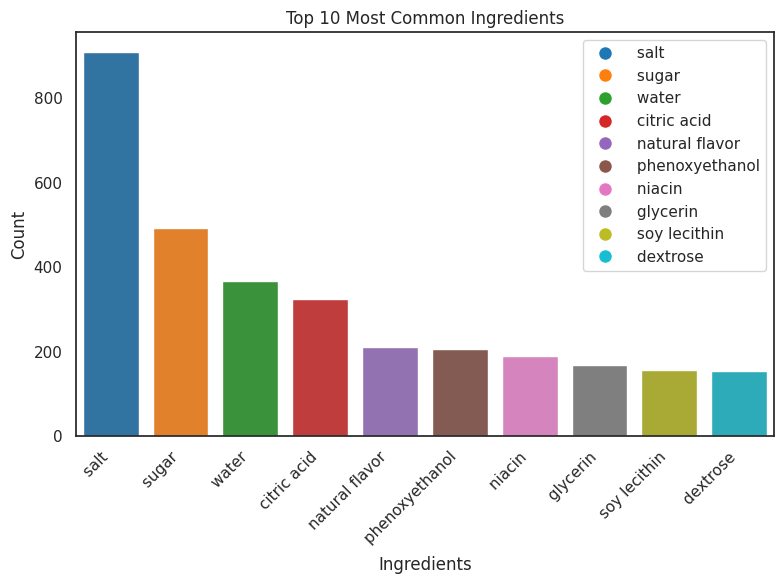

In [ ]:
most_common_ingredients = df_data_viz['ingredients'].str.lower().str.split(',').explode().value_counts().head(10)

# Create the bar plot using Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x=most_common_ingredients.index, y=most_common_ingredients.values, palette="tab10")

# Rotate x-labels for better readability
plt.xticks(rotation=45, ha='right')
plt.xlabel('Ingredients')
plt.ylabel('Count')
plt.title('Top 10 Most Common Ingredients')

# Custom legend creation
from matplotlib.lines import Line2D

# Get the unique ingredients and their respective colors
unique_ingredients = most_common_ingredients.index.tolist()
colors = sns.color_palette("tab10", n_colors=len(unique_ingredients))

# Create custom legend labels with corresponding colors
legend_labels = [Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[i], markersize=10, label=ingredient)
                 for i, ingredient in enumerate(unique_ingredients)]

# Show legend with custom labels
plt.legend(handles=legend_labels, loc='upper right')

plt.tight_layout()
plt.show()

The ingredients most commonly found in these products were salt, sugar, and water, suggesting their frequent inclusion in formulations.

## Top 10 ingredients along with their Ingredients

In [ ]:
# Assuming 'BRAND_NAME' and 'ingredients' are the columns of interest
top_brands = df_data_viz['BRAND_NAME'].value_counts().head(10)
top_brands = top_brands.reset_index()
top_brands.columns = ['BRAND_NAME', 'Count']

# Create a function to format ingredients for hover display

def get_ingredients(brand_name):
    ingredients = df_data_viz[df_data_viz['BRAND_NAME'] == brand_name]['ingredients'].dropna().tolist()
    ingredients = '<br>'.join(ingredients)[:150]  # Limiting to the first 100 characters
    return ingredients

top_brands['Ingredients'] = top_brands['BRAND_NAME'].apply(get_ingredients)

def get_top_ingredients(brand_name):
    ingredients = df_data_viz[df_data_viz['BRAND_NAME'] == brand_name]['ingredients'].dropna().tolist()
    top_ingredients = ', '.join(ingredients[:3])  # Considering only the top three ingredients
    return top_ingredients

# Create the pie chart using Plotly
fig = px.pie(top_brands, values='Count', names='BRAND_NAME', title='Top 10 Brands with their ingredients')
fig.update_traces(hoverinfo='label+percent+name', textinfo='percent', textposition='inside', pull=[0.01] * len(top_brands))

# Add custom hover info to display ingredients
fig.for_each_trace(lambda t: t.update(hovertemplate='Brand: %{label}<br>Ingredients: %{customdata}',
                                      customdata=top_brands['Ingredients']))


# Show the interactive plot
fig.show()

## Similarily Analysis using BERT

In [ ]:
!pip install sentence_transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 8.4 MB/s eta 0:00:00
  Created wheel for sentence_transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125923 sha256=19c96fdd8adbb6adfba14bbcfdc42de0b6de985a2b32325dfdf5a265a2f4f719
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence_transformers


In [ ]:
import torch
from transformers import BertTokenizer, BertModel
from sentence_transformers import SentenceTransformer

In [ ]:
model = SentenceTransformer('stsb-roberta-base')

.gitattributes:   0%|          | 0.00/744 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.92k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/672 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.17k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

In [ ]:
# Read the Excel file with the second sheet
df_data_viz = pd.read_excel('/content/SmarterX_Interns_Sample_Data_Nov2023.xlsx', sheet_name = 1)

In [ ]:
df_data_viz.dropna(subset=['ingredients'],inplace=True)
df_data_viz.reset_index(inplace=True)

In [ ]:
def get_embedding(ingredient):
    # This function would get the embedding for the ingredient
    # and return a 768-dimensional vector
    embedding = model.encode(ingredient)
    return embedding

In [ ]:
df_data_viz["embeddings"] = df_data_viz["ingredients"].apply(get_embedding)

In [ ]:
df_data_viz

,index,UPC,PRODUCT_NAME,BRAND_NAME,ingredients,embeddings
0,0,NaN,Tillamook Farmstyle Thick Cut Medium Cheddar S...,Tillamook,"Medium Cheddar Cheese (Cultured Milk, Salt, En...","[-0.2700659, -0.4764282, 0.59425163, 1.1468518..."
1,1,NaN,Nice N Easy Permanent Creme Color 1 ea,Nice N Easy,"Gray Retexturizing Pre-Treatment: Water, Propy...","[0.23007461, -0.296552, 0.8529975, 0.64112484,..."
2,3,NaN,Skin Effects Acne Spot Treatment 0.25 oz,Skin Effects,"Water (Aqua), Squalane, Butylene Glycol, Allyl...","[-0.30950654, -0.18036936, 0.108600795, 0.7994..."
3,5,NaN,Pride Lip Balm & Scrub Set,The Beauty Crop,"LIP BALM: ETHYLHEXYL PALMITATE, ISONONY ISONON...","[0.44993877, -0.24951757, 0.50882876, -0.13076..."
4,11,NaN,Fierce & Flawless All-in-One Compact with 34 C...,SHANY,"EYE SHADOW INGREDIENTS: Mica, Dimethicone, Tal...","[0.18113355, -0.30725268, -0.23870845, 0.74527..."
...,...,...,...,...,...,...
1732,4327,NaN,WHOLE BODY HEALTH ULTRA PREMIUM KITTEN FOOD,NATURAL BALANCE,"CHICKEN, CHICKEN MEAL, PEA PROTEIN, PEAS, CHIC...","[-0.18169646, -0.55534524, -0.33196768, -0.485..."
1733,4328,NaN,e.l.f. Clear Hydrating Face Primer 1.01 fl oz,e.l.f.,"Dimethicone, Dimethicone Crosspolymer, Synthet...","[0.21149331, 0.19232543, 0.33073103, 0.0452588..."
1734,4330,NaN,Base Culture Sweet Banana Bread 3.2 oz,Base Culture,"Bananas (Non-GMO Ingredients), Honey (Non-GMO ...","[0.40701503, -0.29005566, -0.06423252, 0.93749..."
1735,4332,NaN,Snuggle Blue Sparkle Fabric Conditioner 50 fl ...,Snuggle,"Water (Eau), Diethyl Ester Dimethyl Ammonium C...","[-0.57722676, -0.42882636, 0.24230157, 0.51338..."


In [ ]:
import numpy as np
from scipy.spatial.distance import cdist

In [ ]:
df_data_viz['len'] = 0
for i in range(len(df_data_viz)):
  df_data_viz['len'][i] = len(df_data_viz['ingredients'][i])

<ipython-input-49-6a44b1446cea>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data_viz['len'][i] = len(df_data_viz['ingredients'][i])


In [ ]:
df = df_data_viz[df_data_viz['len']>200]

In [ ]:
# product_names = df['PRODUCT_NAME'].to_list()
# embedding_vectors = df['embeddings'].to_list()

# cosine_similarity_matrix = cdist(embedding_vectors, embedding_vectors, metric='cosine')

# # Find the most similar product for each product
# most_similar_products = []
# for i in range(len(cosine_similarity_matrix)):
#     most_similar_product_index = np.argmax(cosine_similarity_matrix[i])
#     most_similar_product_name = product_names[most_similar_product_index]
#     most_similar_products.append((product_names[i], most_similar_product_name))

# # Print the results
# for product, similar_product in most_similar_products:
#     print(f"Product: {product}")
#     print(f"Most similar product: {similar_product}")

In [ ]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

# Assuming df_data_viz is your DataFrame with columns 'ing_embedd', 'product_name', 'brand_name'
# Make sure 'ing_embedd' is a column containing the embedding vectors of size 768

# Calculate cosine similarity matrix
cosine_sim_matrix = cosine_similarity(df['embeddings'].tolist(), df['embeddings'].tolist())

# Create a DataFrame for the similarity matrix
cosine_sim_df = pd.DataFrame(cosine_sim_matrix, index=df['PRODUCT_NAME'], columns=df['PRODUCT_NAME'])

# Function to get similar products
def get_similar_products(product_name, cosine_sim_df, top_n=5):
    similar_products = cosine_sim_df[product_name].sort_values(ascending=False)[1:top_n+1]
    return similar_products

In [ ]:
# # Example: Get similar products for a specific product
# #for name in df['PRODUCT_NAME'].to_list():
# target_product = "XTRA CHEDDAR BAKED SNACK CRACKERS"
# similar_products = get_similar_products(target_product, cosine_sim_df)
# print(f"Five Most similar products for {target_product}:\n{similar_products}")

Five Most similar products for XTRA CHEDDAR BAKED SNACK CRACKERS:
PRODUCT_NAME
CHEDDAR JALAPENO MEGA BITES BAKED SNACK CRACKERS                                     0.935477
Goldfish Disney Princess Cheddar Baked Snack Crackers 6.6 oz                         0.921035
BAKED SNACK CRACKERS                                                                 0.886940
Goldfish Family Size Colors Colors Cheddar Baked Snack Crackers Family Size 10 oz    0.873913
STUFFED PRETZEL BREAD SANDWICH                                                       0.853017
Name: XTRA CHEDDAR BAKED SNACK CRACKERS, dtype: float32


In [ ]:
# Example: Get similar products for a specific product

# Function to get similar products
def get_similar_products_table(product_name, cosine_sim_df, top_n=5):
    similar_products = cosine_sim_df[product_name].sort_values(ascending=False)[1:top_n+1]
    similar_products_df = pd.DataFrame(similar_products)
    similar_products_df.reset_index(inplace=True)
    similar_products_df.columns = ['Similar Products', 'Similarity Score']
    return similar_products_df

# Example: Get similar products for a specific product
target_product = "XTRA CHEDDAR BAKED SNACK CRACKERS"
similar_products_table = get_similar_products_table(target_product, cosine_sim_df)
print(f"Five Most similar products for {target_product}")
similar_products_table


Five Most similar products for XTRA CHEDDAR BAKED SNACK CRACKERS


,Similar Products,Similarity Score
0,CHEDDAR JALAPENO MEGA BITES BAKED SNACK CRACKERS,0.935477
1,Goldfish Disney Princess Cheddar Baked Snack C...,0.921035
2,BAKED SNACK CRACKERS,0.886940
3,Goldfish Family Size Colors Colors Cheddar Bak...,0.873913
4,STUFFED PRETZEL BREAD SANDWICH,0.853017


In [ ]:
df2 = df_data_viz[df_data_viz['len']>1500]

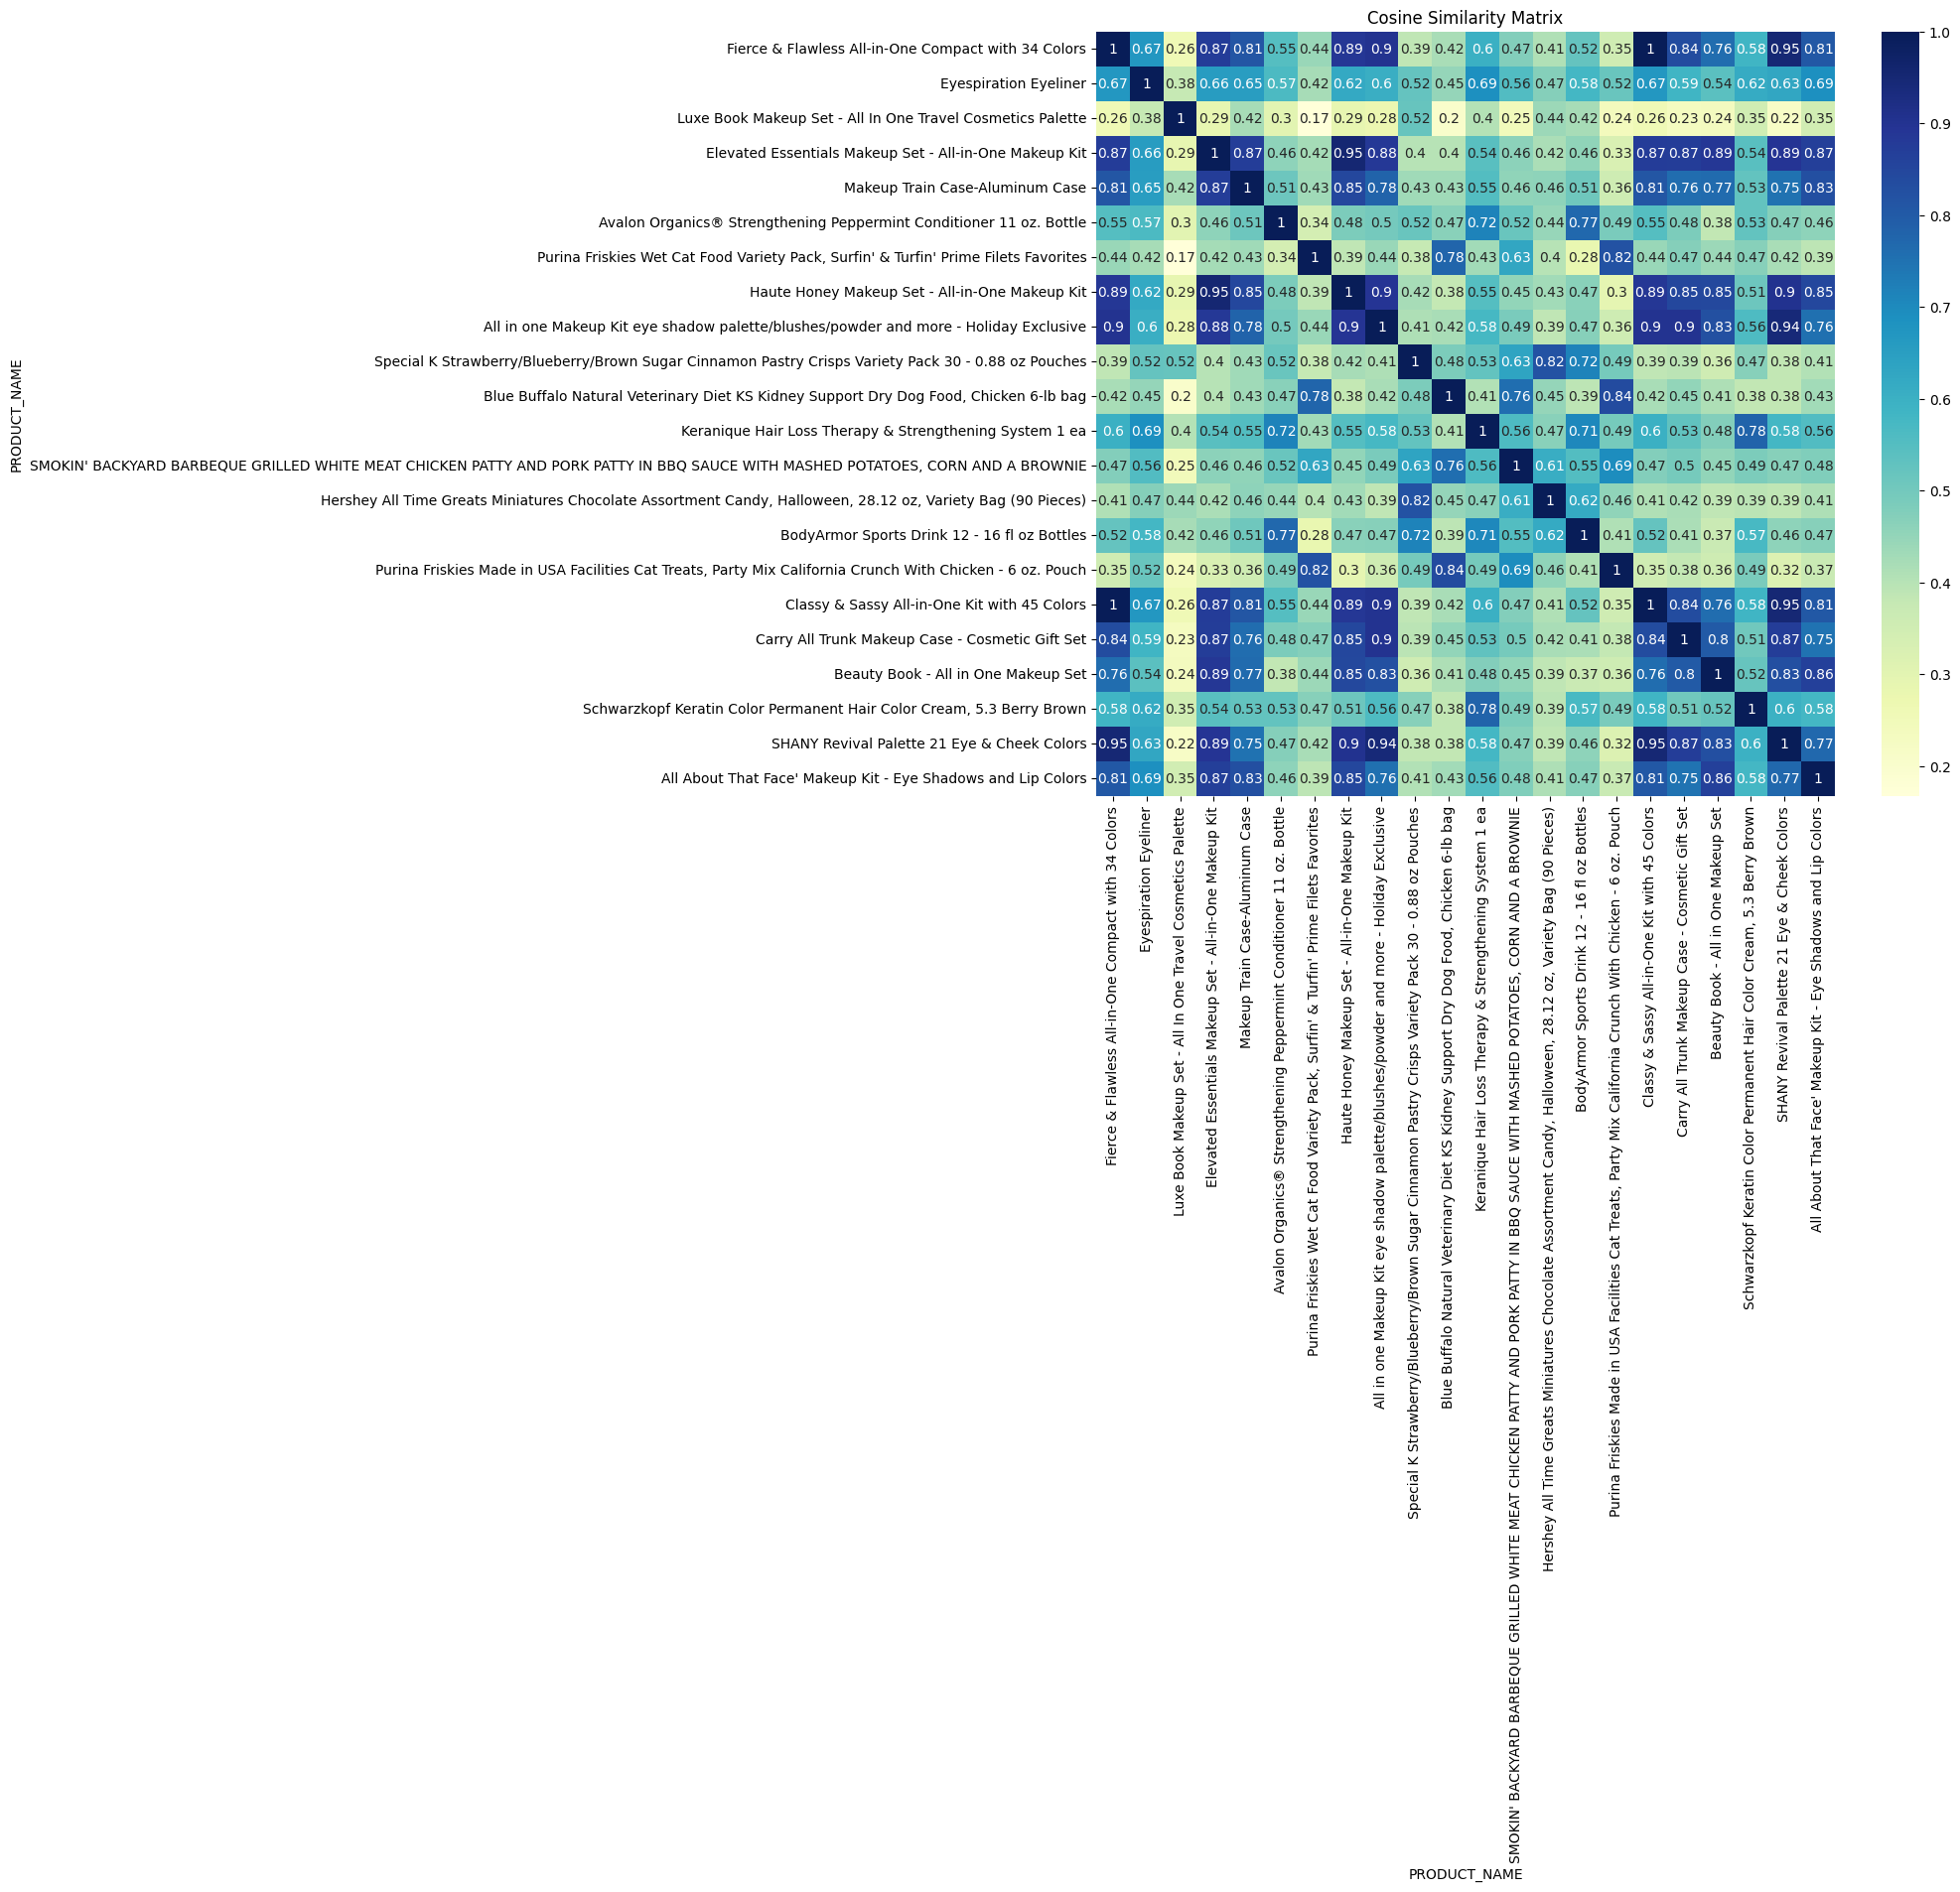

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_data_viz is your DataFrame with columns 'ing_embedd', 'product_name', 'brand_name'
# 'ing_embedd' should contain the 768-dimensional embedding vectors as lists

# Convert the 'ing_embedd' column to NumPy arrays
embeddings_array = np.array(df2['embeddings'].tolist())

# Calculate cosine similarity matrix
cosine_sim_matrix = cosine_similarity(embeddings_array, embeddings_array)

# Create a DataFrame for the similarity matrix
cosine_sim_df = pd.DataFrame(cosine_sim_matrix, index=df2['PRODUCT_NAME'], columns=df2['PRODUCT_NAME'])

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(cosine_sim_df, cmap='YlGnBu', annot=True)
plt.title('Cosine Similarity Matrix')
plt.show()


# 3. Generating a Marketing Copy

In [ ]:
from IPython.display import HTML, display

def set_css():
  display(HTML('''
  <style>
    pre {
        white-space: pre-wrap;
    }
  </style>
  '''))
get_ipython().events.register('pre_run_cell', set_css)

In [ ]:
marketing_prompt = 'generate a brief, coherent marketing copy for a set of products, using the product name and item brand name given below. The model should output a short, persuasive marketing copy that highlights the unique feature of the product that makes someone healthier. And remember, your marketing copy must be legal!'

In [ ]:
print(marketing_prompt)

generate a brief, coherent marketing copy for a set of products, using the product name and item brand name given below. The model should output a short, persuasive marketing copy that highlights the unique feature of the product that makes someone healthier. And remember, your marketing copy must be legal!


In [ ]:
def get_response(context):
  response = openai.completions.create(
      model="text-davinci-003",
      temperature = 0,
      prompt= marketing_prompt + context,
      max_tokens=150,
      n=1,
      stop=None,
  )
  classified_category = response.choices[0].text
  return classified_category

In [ ]:
marketing_context = 'Product Name - Tillamook Farmstyle Thick Cut Medium Cheddar Shredded Cheese 8 oz \
and Brand Name - Tillamook '

In [ ]:
print(get_response(marketing_context))



Tillamook Farmstyle Thick Cut Medium Cheddar Shredded Cheese 8 oz is the perfect way to add flavor and nutrition to your meals. Our cheese is made with only the finest ingredients, and is aged to perfection for a rich, creamy flavor. Our medium cheddar is a great source of calcium and protein, making it a healthier choice for your family. Plus, it's pre-shredded, so you can easily add it to your favorite dishes. Enjoy the delicious taste of Tillamook Farmstyle Thick Cut Medium Cheddar Shredded Cheese 8 oz today!
